## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import math
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load dataset

In [ ]:
df=pd.read_csv("emails.txt", sep='\t',names=["label","message"])
# df.rename(columns={0: "a", 1: "c"}
# df.set_index("label", inplace = True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###Global Variables 

In [ ]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)
docfreq=dict()
idf=dict()
index=dict()
model=dict()
label=dict()
total_words=0

### Preprocess data

In [ ]:
def clean(message):
  message=message.lower().translate(translator)
  words=word_tokenize(message)
  words=[x for x in words if not x.isnumeric()] #removing numbers
  words=[x for x in words if x not in stop]
  # print(words)
  tokens=list()
  
  # for word in words:
  #   tokens.append(stemmer.stem(word))
  tokens=[stemmer.stem(word) for word in words]

  return ' '.join(tokens)
  # print(tokens)



# clean("123 hello I am running")

In [ ]:
df['message']=df['message'].apply(lambda x:clean(x))
df

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,2nd time tri contact u u £750 pound prize clai...
5568,ham,ü b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


### Split data

In [ ]:
df=df.sample(frac=1,random_state=2)

In [ ]:
row,col = df.shape
split_train=math.floor(0.6*row)
split_validation=math.floor(0.8*row)
train=df[0:split_train]
validation=df[split_train:split_validation]
test=df[split_validation:]
train

,label,message
5086,ham,omg one thing anoth cat worm bad day end
2120,ham,hope know im still mad
2318,ham,waqt se pehl naseeb se zyada kisi ko kuch nahi...
2917,ham,time tell friend around
1352,ham,yo there class tmrw right
...,...,...
4861,ham,respons one power weapon occupi place other he...
4528,ham,understand loss gain work school
2368,ham,v nice sheffield tom air opinion categori b us...
2029,ham,kalli readi bat 2nd inning


###TF-IDF Function

In [ ]:
def document_freq(message):
  tokens=word_tokenize(message)
  for word in tokens:
    docfreq.setdefault(word,0)
    docfreq[word]+=1

In [ ]:
def tf(message):
  words=word_tokenize(message)
  termf=dict()
  n=0
  for word in words:
    if docfreq.get(word,None) == None:
      continue
    termf.setdefault(word,0)
    termf[word]+=1
    n+=1
  return termf,n

In [ ]:
def indexing():
  total_words=len(docfreq)
  count=0
  for key in docfreq.keys():
    index[key]=count
    idf[key]=math.log((split_train + 1)/(docfreq[key] + 1))
    count+=1


In [ ]:
def tf_idf(message):
  vec=[0] * total_words
  term_freq_tokens,word_count=tf(message)
  
  for word in term_freq_tokens.keys():
    if docfreq.get(word,None) == None:
      continue
    term_freq= term_freq_tokens[word]/word_count
    vec[index[word]] = term_freq * idf[word]
  return np.array(vec)

In [ ]:
def vectorizer(message,tag):
  model[message]=tf_idf(message)
  label[message]=tag

###Distance

####Cosine

In [ ]:
cosine=lambda a,b: np.inner(a,b)/(LA.norm(a)*LA.norm(b))

####Euclidean

In [ ]:
euclidean= lambda a,b: LA.norm(a-b)

Manhattan

In [ ]:
manhattan= lambda a,b: np.abs(a-b).sum()

####Hamming

In [ ]:
# hamming = lambda a,b : distance.hamming(a,b)

### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

In [ ]:
train['message'].apply(lambda x:document_freq(x))
indexing()
# print(index)
total_words = len(docfreq)
# print(total_words)
for i, row in train.iterrows():
  vectorizer(row['message'],row['label'])

# train['message'].apply(lambda x:vectorizer(x))
# for key,val in model.items():
#   if None in val:
#     print(key)

In [ ]:
def majority(label):
  h=0
  s=0
  # return 'ham'
  for x in label:
    if x[1]=='ham':
      h+=1
    else:
      s+=1
  if h>s:
    return 'ham'
  else:
    return 'spam'

In [ ]:
def knn(k,message,dist='cosine'):
  # print(cosine_distance(k,message))
  flag=False
  message=clean(message)
  vec=tf_idf(message)
  ans=list()

  if dist == 'cosine':
    func=cosine
    flag=True
  elif dist == 'euclidean':
    func=euclidean
  elif dist == 'manhattan':
    func = manhattan
  # elif dist == 'hamming':
  #   func = hamming



  for msg,arr in model.items():
    sim=func(vec,arr)
    # x=str(df['label'][df['message']== msg])
    
    # x=x.split()[1].split('\n')[0]
    x=label[msg]
    ans.append((sim,x))
  ans.sort(reverse=flag)
  return majority(ans[:k])

In [ ]:
# data = train.iloc[0]["message"]
# data

In [ ]:
# %%time
# knn(5,data)

In [ ]:
def predict(k,valid,dist='cosine'):
  predicted=list()
  actual= list()
  eval = list()
  for i, row in valid.iterrows():
    # if len(row['message'])==0:
    #   continue
    pred=knn(k ,row['message'],dist)
    tru=row['label']
    predicted.append(pred)
    actual.append(tru)
    # if pred == tru:
    #   correct+=1
    # total+=1
  eval.append([predicted,actual])
  cm = confusion_matrix(actual, predicted,labels=['ham','spam'])
  return cm

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [ ]:
# train['message'].apply(lambda x: knn(5,x))
# eval = list()
distances= ['cosine','euclidean', 'manhattan']
k_val=[1,3,5,7,11,17,23,28]
conf_mat=dict()
for d in distances:
  acc=[]
  for k in k_val:
    # predicted=list()
    # actual= list()
    # for i, row in validation.iterrows():
    #   pred=knn(k ,row['message'],'cosine')
    #   tru=row['label']
    #   predicted.append(pred)
    #   actual.append(tru)
    #   # if pred == tru:
    #   #   correct+=1
    #   # total+=1
    # eval.append([predicted,actual])
    # cm = confusion_matrix(actual, predicted)
    # print(cm)
    cm=predict(k,validation,d)
    acc.append(cm)
  conf_mat[d]=acc
  # print(idf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry poin

***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

Cosine similarity is basically finding cosine angle between two vectors. the advantage of cosine similarity in higher dimensional space is that even if the similar emails are placed far away ( w.r.t to manhattan and euclidean distance) then also there are high chances that they are closely oriented (angle between them will be less the more oriented they are).
Note please look the below graph to see performance difference. 

***3.Why accuracy is not enough?***

Accuracy tells us how much correct predictions it has done. It doesn't pictures whether the positive value were more correctly predicted or negative value were correctly predicted more.

For imbalanced data like the one givento us accuracy is not good evaluation metric to evaluate model's performance.

For checking how much correct true positive are calculated we take help of precision.
I f we wnat to take in consideration about false negative then recall metric is good.

In our question we need to main tain balance betwwen both precison and recall. They are both important factors. To get a good balaance we use F1 score.

F1 score= 2*(precision * recall) / (precison + recall) [Harmonic Mean of Precison and Recall]


***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing F1 score vs k.***

In [ ]:


def cal_f1(distance):
  f1_val=list()
  for mat in conf_mat[distance]:
    numerator=mat[1][1]
    denominator=numerator + (mat[0][1] + mat[1][0])/2
    f1=numerator/denominator
    f1_val.append(f1)
  return f1_val

# cal_f1()

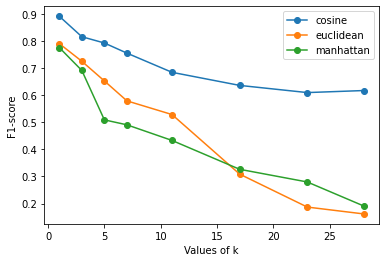

In [ ]:

for key,val in conf_mat.items():
  f2_val=cal_f1(key)
  plt.plot(k_val,f2_val,label=key,marker='o')
plt.legend()
plt.xlabel('Values of k')
plt.ylabel('F1-score')
plt.show()

In [ ]:
def cal_single_f1(mat):
  numerator=mat[1][1]
  denominator=numerator + (mat[0][1] + mat[1][0])/2
  f1=numerator/denominator
  return f1

In [ ]:
cm=predict(3,test,'cosine')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
print("F1 Score:",cal_single_f1(cm))
tn,fp,fn,tp=cm.ravel()
print("Confusion Matrix: ",cm)
recall= tp/(tp+fn)
print("Recall:",recall)
precision= tp/(tp+fp)
print('Precision:',precision)

my_knn_acc= (tn + tp) / (tn + tp + fp + fn)
print("Accuracy: ",my_knn_acc)

F1 Score: 0.8551724137931035
Confusion Matrix:  [[949   9]
 [ 33 124]]
Recall: 0.7898089171974523
Precision: 0.9323308270676691
Accuracy:  0.9623318385650225


### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

train_x=list()
train_y=list()
test_x=list()


for key in model.keys():
  train_x.append(model[key])
  train_y.append(label[key])

trained = KNeighborsClassifier(n_neighbors=3,metric='cosine',algorithm='brute')
trained.fit(train_x,train_y)


KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=3)

In [ ]:
true_y=list()
for i,row in test.iterrows():
  # print(row['message'])
  test_x.append(tf_idf(row['message']))
  true_y.append(str(row['label']))

In [ ]:
y=trained.predict(test_x)

  # print(type(str(d)))

***Compare both the models result.***

In [ ]:
print("The f1 score of sklearn knn is :",metrics.f1_score(true_y,y,pos_label='spam'))
print("The f1_score of my knn is :",cal_single_f1(cm))

print("Accuracy of sklearn knn :",metrics.accuracy_score(true_y,y))
print("Accuracy of my knn :",my_knn_acc)


The f1 score of sklearn knn is : 0.8771929824561403
The f1_score of my knn is : 0.8551724137931035
Accuracy of sklearn knn : 0.968609865470852
Accuracy of my knn : 0.9623318385650225


From above it is seen that both Sklearn knn aand built from scratch knn have similar accuracy and f1 score. therefore in terms of accuracy of output both are similar.

***What is the time complexity of training using KNN classifier?***

We are using brute force approach. Therefore time complexity to train knn classifier is **O(1)** as no training is needed in this approach.

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***

Time complexity to test in knn to test is **O(n*d)** where,<br>
n = No. of points in train set<br>
d = dimension of vector through which calculation takes place.

A classifier is said to be a linear classifier if it makes decision on the basis of a boundary ( here boundary should be hyperplane as we are talking about linear classifier) whether decision is positive or negative.

In case of knn the boundary is generally curved , which is not hyperplane therefore knn is not a linear classifier. For example if positive points are densely populated at a position then the knn would generated a curve boundary

As knn is not linear classifier so it can learn boundaries.